In [1]:
# 모듈 불러오기

import tensorflow as tf
import matplotlib.pyplot as plt

In [12]:
# Fashion MNIST 데이터셋 불러오기

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

In [17]:
# 데이터 확인

train_X
train_X[0][0], train_Y[0]   # 1번째 사진은 부츠(9)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0], dtype=uint8),
 9)

In [5]:
train_X.shape, train_Y.shape

((60000, 28, 28), (60000,))

In [6]:
# 데이터셋 정규화

train_X = train_X / 255.0
test_X = test_X / 255.0

In [9]:
# 데이터셋 차원(채널) 추가

train_X = train_X.reshape(60000, 28, 28, 1) #2차원(28*28)에서 3차원(28*28*1)으로 변환(색 차원 추가)
test_X = test_X.reshape(10000, 28, 28, 1)

In [10]:
#reshape 이후 shape 확인

print(train_X.shape, test_X.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


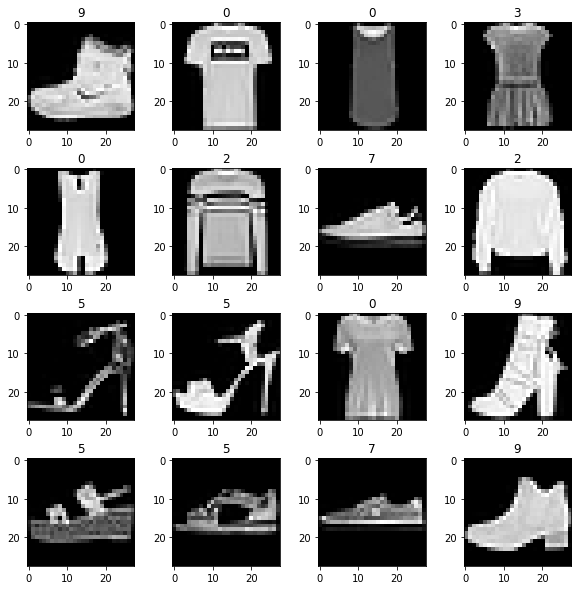

In [22]:
# 데이터 확인

plt.figure(figsize=(10,10))

for c in range(16):
    plt.subplot(4, 4, c+1)
    plt.title(train_Y[c])
    plt.imshow(train_X[c].reshape(28,28), cmap="gray")   # (28,28,1) --> (28,28) 

plt.subplots_adjust(hspace=0.35)
plt.show()    

In [23]:
# train 데이터의 1번째 ~ 16번째 까지의 라벨 출력

print(train_Y[:16])

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [27]:
# 컨볼루션 신경망 모델 정의

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=16), #, padding="same"), # padding="valid"*26*26), "same"으로 변경시 28*28
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        4640      
                                                                 
 conv2d_11 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 flatten_3 (Flatten)         (None, 30976)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               3965056   
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,989,642
Trainable params: 3,989,642
No

In [28]:
convd1 = 1*(3*3)*16+16 # (param) kernel * filters + bias
convd2 = 16*(3*3)*32+32 # (param) channels * kernel * filters + bias
convd3 = 32*(3*3)*64+64 # (param) channels * kernel * filters + bias
flatten1 = 22*22*64  # (output) datasize * channels(pre. filters)
dense1 = 22*22*64*128+128  # flatten_out * nodes + bias
dense2 = 128*10+10 # nodes*labes + bias
print(convd1, convd2, convd3, flatten1, dense1, dense2)

160 4640 18496 30976 3965056 1290


In [31]:
# 모델 학습 및 평가 : 60,000/0.75/32batch = 1406.25 (개인 노트북에서 1포크당 3분 소요)

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25) # batch = 32

Epoch 1/25
1407/1407 [==============================] - 168s 119ms/step - loss: 2.0230 - accuracy: 0.6143 - val_loss: 0.7951 - val_accuracy: 0.7420
Epoch 2/25
1407/1407 [==============================] - 175s 124ms/step - loss: 0.7242 - accuracy: 0.7463 - val_loss: 0.6593 - val_accuracy: 0.7533
Epoch 3/25
1407/1407 [==============================] - 191s 136ms/step - loss: 0.5898 - accuracy: 0.7930 - val_loss: 0.6076 - val_accuracy: 0.8002
Epoch 4/25
1407/1407 [==============================] - 184s 131ms/step - loss: 0.5782 - accuracy: 0.8068 - val_loss: 0.6992 - val_accuracy: 0.7760
Epoch 5/25
1407/1407 [==============================] - 189s 134ms/step - loss: 1.3260 - accuracy: 0.7001 - val_loss: 2.6196 - val_accuracy: 0.1040
Epoch 6/25
1407/1407 [==============================] - 190s 135ms/step - loss: 2.4004 - accuracy: 0.0988 - val_loss: 2.3141 - val_accuracy: 0.1039
Epoch 7/25
1407/1407 [==============================] - 185s 132ms/step - loss: 2.3074 - accuracy: 0.0987 - val_

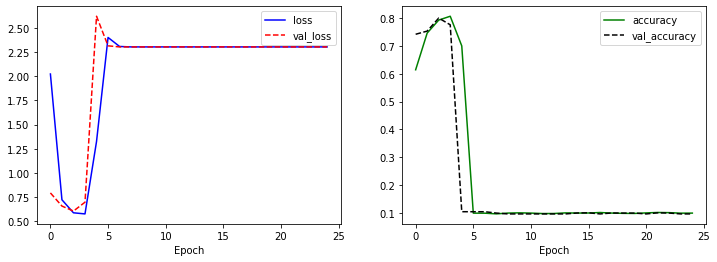

[2.3026280403137207, 0.10000000149011612]

In [34]:
#  학습결과 확인 : train_loss & val_loss

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], "b-", label="loss")
plt.plot(history.history["val_loss"], "r--", label="val_loss")
plt.xlabel("Epoch")
plt.legend()

# train accuracy & val_accuracy

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], "g-", label="accuracy")
plt.plot(history.history["val_accuracy"], "k--", label="val_accuracy")
plt.xlabel("Epoch")
#plt.ylim(0.7, 1)
plt.legend()
plt.show()

# 평가용 데이터에 대한 성능평가

model.evaluate(test_X, test_Y, verbose=0)

In [35]:
# 과적합 해소를 위해 풀링 레이어, 드롭아웃 추가

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=32), # 3,3 커널로 인해 28->26
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

model.summary()    # 기존 모델 대비 학습 파라미터가 90% 이상 감소 (3,989,642 -> 241,546)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 flatten_4 (Flatten)         (None, 1152)             

In [37]:
print((3*3)*32+32)
print(26/2)
print(32*(3*3)*64+64)
print(11/2)
print(64*(3*3)*128+128)
print(3*3*128)
print(1152*128+128)
print(128*10+10)

320
13.0
18496
5.5
73856
1152
147584
1290


In [36]:
# 모델 학습 및 평가 (개인 노트북 1포크당 35초 소요)

history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25) # batch = 32 or 500

Epoch 1/25
1407/1407 [==============================] - 32s 22ms/step - loss: 1.2279 - accuracy: 0.6760 - val_loss: 0.5376 - val_accuracy: 0.8088
Epoch 2/25
1407/1407 [==============================] - 37s 27ms/step - loss: 0.5953 - accuracy: 0.7816 - val_loss: 0.4379 - val_accuracy: 0.8481
Epoch 3/25
1407/1407 [==============================] - 38s 27ms/step - loss: 0.5407 - accuracy: 0.8079 - val_loss: 0.4628 - val_accuracy: 0.8399
Epoch 4/25
1407/1407 [==============================] - 36s 26ms/step - loss: 0.5432 - accuracy: 0.8110 - val_loss: 0.4079 - val_accuracy: 0.8545
Epoch 5/25
1407/1407 [==============================] - 35s 25ms/step - loss: 0.5296 - accuracy: 0.8144 - val_loss: 0.4860 - val_accuracy: 0.8292
Epoch 6/25
1407/1407 [==============================] - 33s 23ms/step - loss: 0.5883 - accuracy: 0.8026 - val_loss: 0.4658 - val_accuracy: 0.8509
Epoch 7/25
1407/1407 [==============================] - 33s 23ms/step - loss: 0.5063 - accuracy: 0.8270 - val_loss: 0.4923 -

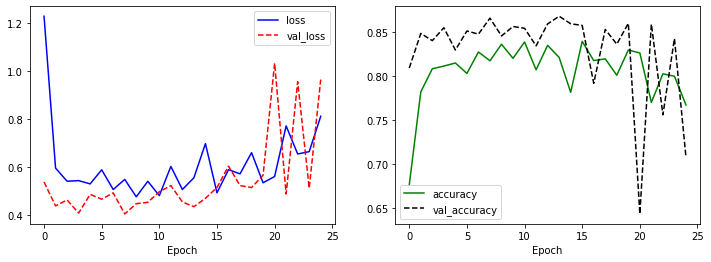

[0.9680839776992798, 0.7042999863624573]

In [38]:
#  학습결과 확인 : train_loss & val_loss

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], "b-", label="loss")
plt.plot(history.history["val_loss"], "r--", label="val_loss")
plt.xlabel("Epoch")
plt.legend()

# train accuracy & val_accuracy

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], "g-", label="accuracy")
plt.plot(history.history["val_accuracy"], "k--", label="val_accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# 평가용 데이터에 대한 성능평가

model.evaluate(test_X, test_Y, verbose=0)

In [39]:
# VGGnet 유형으로 모델 정의 - 제로패딩 사용 + 활성함수(relu) 사용

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=32, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding="valid", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation="relu"),    
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

model.summary()    # 학습 파라미터(3,989,642 -> 241,546 -> 5,240,842)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_16 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_18 (Conv2D)          (None, 12, 12, 256)       295168    
                                                      

In [40]:
convd1 = 3*3*32+32 # (param) kernel * filters + bias
convd2 = 32*(3*3)*64+64 # (param) channels * kernel * filters + bias
maxpool1 = 28/2 # (output) input_size / stride
dropout1 = 28/2 # (output) = maxpool1 out
convd3 = 64*(3*3)*128+128 # (param) channels * kernel * filters + bias
convd4 = 128*(3*3)*256+256 # (param) channels * kernel * filters + bias | (output) maxpool1_out - 2
maxpool2 = 12/2 # (output) input_size / stride
dropout2 = 12/2 # (output) = maxpool2 out
flatten1 = 6*6*256  # (output) datasize * channels(pre. filters)
dense1 = 6*6*256*512+512  # flatten_out * nodes(units) + bias
dropout3 = 512 # (output) = units keep
dense2 = 512*256+256 # channels * nodes + bias
dropout4 = 256 # (output) = units keep
dense3 = 256*10+10 # nodes * labels + bias
print(convd1,convd2, maxpool1, dropout1, convd3, convd4, maxpool2, dropout2, flatten1, dense1, dropout3, dense2, dropout4, dense3)

320 18496 14.0 14.0 73856 295168 6.0 6.0 9216 4719104 512 131328 256 2570


In [41]:
# 모델 학습 및 평가 (개인노트북 1포크당 7분 소요)

history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25) # batch = 32

Epoch 1/25
1407/1407 [==============================] - 403s 285ms/step - loss: 0.8749 - accuracy: 0.7333 - val_loss: 0.4097 - val_accuracy: 0.8464
Epoch 2/25
 221/1407 [===>..........................] - ETA: 5:29 - loss: 0.5452 - accuracy: 0.8068

KeyboardInterrupt: 

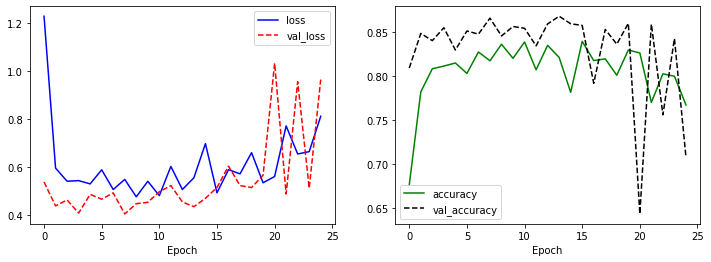

[0.40529632568359375, 0.8562999963760376]

In [42]:
#  학습결과 확인 : train loss & val_loss

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], "b-", label="loss")
plt.plot(history.history["val_loss"], "r--", label="val_loss")
plt.xlabel("Epoch")
plt.legend()

# train accuracy & val_accuracy

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], "g-", label="accuracy")
plt.plot(history.history["val_accuracy"], "k--", label="val_accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# 평가용 데이터에 대한 성능평가

model.evaluate(test_X, test_Y, verbose=0)